## Circular waveguide - Discussion

In [84]:
import os
import sys
import fenics as fen
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse.linalg

In [85]:
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath('__file__')))))
from circular_waveguide import CircularWaveguide
import src.helpers as helpers
from src.vector_space import VectorSpaceL2

### Dimensions and properties

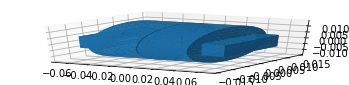

In [86]:
mesh = fen.Mesh('model/DMCWF.xml')
#mesh = fen.Mesh('model/DMCWF_alt.xml')
mesh.coordinates()[:] = mesh.coordinates()[:] * 1e-3
fen.plot(mesh)

In [87]:
# Dimensions in meters
Lc = 0.04387  # Length of the cavities
Ls = 0.00150  # Length of the slots
Lr = 0.02000  # Length of rectangular input/output WR75-waveguide
Hr = 0.009525 # Height of rectangular input/output WR75-waveguide
Wr = 0.01905  # Width of rectangular input/output WR75-waveguide

Dx = Ls/2 + Lc + Ls + Lr  # |x|-coordinate of input/output boundary
Dy = Wr/2  # |y|-limit of input/output boundary
Dz = Hr/2  # |z|-limit of input/output boundary

In [93]:
class B_N(fen.SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and fen.near(abs(x[0]), Dx) and x[1]>-Dy and x[1]<Dy and x[2]>-Dz and x[2]<Dz

class g_N_L(fen.UserExpression):
    def eval(self, value, x):
        value[0] = 0.0
        value[1] = 0.0
        value[2] = 1.0 / (4e-7*np.pi) if fen.near(x[0], -Dx) else 0.0
    def value_shape(self):
        return (3,)
    
class g_N_R(fen.UserExpression):
    def eval(self, value, x):
        value[0] = 0.0
        value[1] = 0.0
        value[2] = - 1.0 / (4e-7*np.pi) if fen.near(x[0], -Dx) else 0.0
    def value_shape(self):
        return (3,)

class trace(fen.SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and fen.near(x[0], Dx) and x[1]>-Dy and x[1]<Dy and x[2]>-Dz and x[2]<Dz

WG = CircularWaveguide(mesh, B_N, g_N=g_N_L())
VS = VectorSpaceL2(WG, trace())

### Solution of problem

In [97]:
WG.setup()
#WG.solve(4e+10)
#WG.plot_solution()

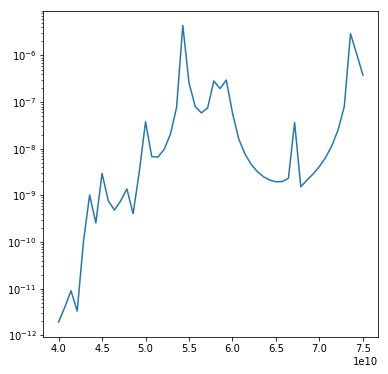

In [72]:
fig, ax = plt.subplots(figsize=(6, 6), sharex=True)
omegas = np.linspace(4e+10, 7.5e+10, 50)
helpers.plot_L2_norms(ax, WG, omegas, VS)

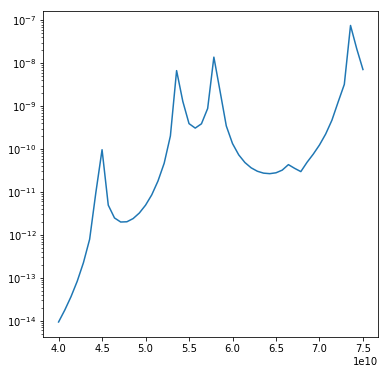

In [95]:
fig, ax = plt.subplots(figsize=(6, 6), sharex=True)
omegas = np.linspace(4e+10, 7.5e+10, 50)
helpers.plot_L2_norms(ax, WG, omegas, VS)